In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from datetime import datetime # Para pegar a data atual
import matplotlib.dates as mdates

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\922442630.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Usuários', y='Midia', data=agrupado, palette=cores.values(), edgecolor='black', width=0.9)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  dat

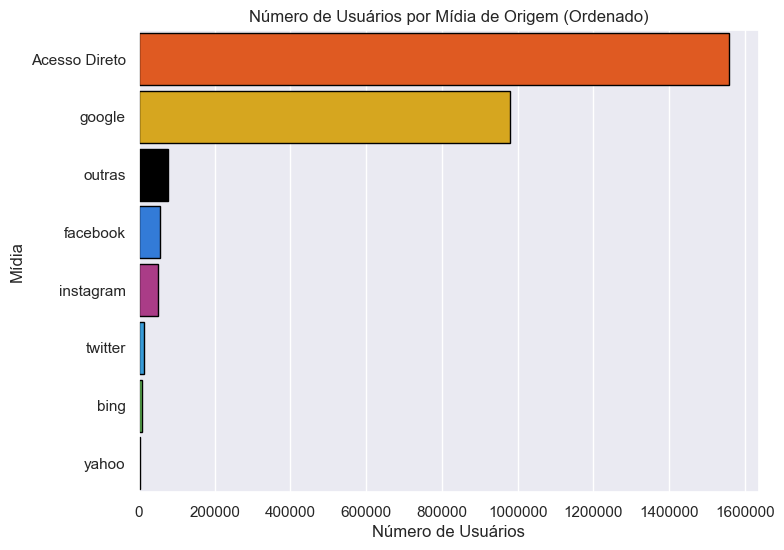

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

'''
LINK: https://analytics.google.com/

https://analytics.google.com/analytics/web/#/p308444970/reports/explorer?params=_u..nav%3Dmaui&r=lifecycle-traffic-acquisition-v2&ruid=lifecycle-traffic-acquisition-v2,life-cycle,acquisition&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Aquisição (dropdown) > Aquisição de tráfego

Ações: Grupo de canais padrão da sessão (dropdown do gráfico) >>> Origem / mídia da sessão

Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

# Carregar o DataFrame a partir do CSV
df = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\origem.csv', skiprows=9)

# Função para agrupar os usuários por mídia
def agrupar_por_midia(row):
    if 'facebook' in row['Origem / mídia da sessão']:
        return 'facebook'
    elif 'instagram' in row['Origem / mídia da sessão']:
        return 'instagram'
    elif 'google' in row['Origem / mídia da sessão']:
        return 'google'
    elif 'yahoo' in row['Origem / mídia da sessão']:
        return 'yahoo'
    elif 'bing' in row['Origem / mídia da sessão']:
        return 'bing'
    elif 't.co' in row['Origem / mídia da sessão']:
        return 'twitter'
    elif '(direct) / (none)' in row['Origem / mídia da sessão']:
        return 'Acesso Direto'
    else:
        return 'outras'

df['Midia'] = df.apply(agrupar_por_midia, axis=1)

# Agrupar e somar usuários por mídia
agrupado = df.groupby('Midia')['Usuários'].sum().reset_index()

# Ordenar as barras da maior para a menor
agrupado = agrupado.sort_values(by='Usuários', ascending=False)

# Cores correspondentes às mídias

cores = {
    'Acesso Direto': '#FF4D02',
    'google': '#F4B400',
    'outras': '#000',
    'facebook': '#1877f2',
    'instagram': '#bc2a8d',
    'twitter': '#1DA1F2',
    'bing': '#50bf40',
    'yahoo': '#008373'
}

# Inicializar o estilo do Seaborn
sns.set_theme()

# Criar o gráfico de barras horizontais com Seaborn e Matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(x='Usuários', y='Midia', data=agrupado, palette=cores.values(), edgecolor='black', width=0.9)

# Adicionar rótulos e título
plt.xlabel('Número de Usuários')
plt.ylabel('Mídia')
plt.title('Número de Usuários por Mídia de Origem (Ordenado)')
plt.ticklabel_format(axis='x', style='plain')

# Exibir o gráfico
plt.show()

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

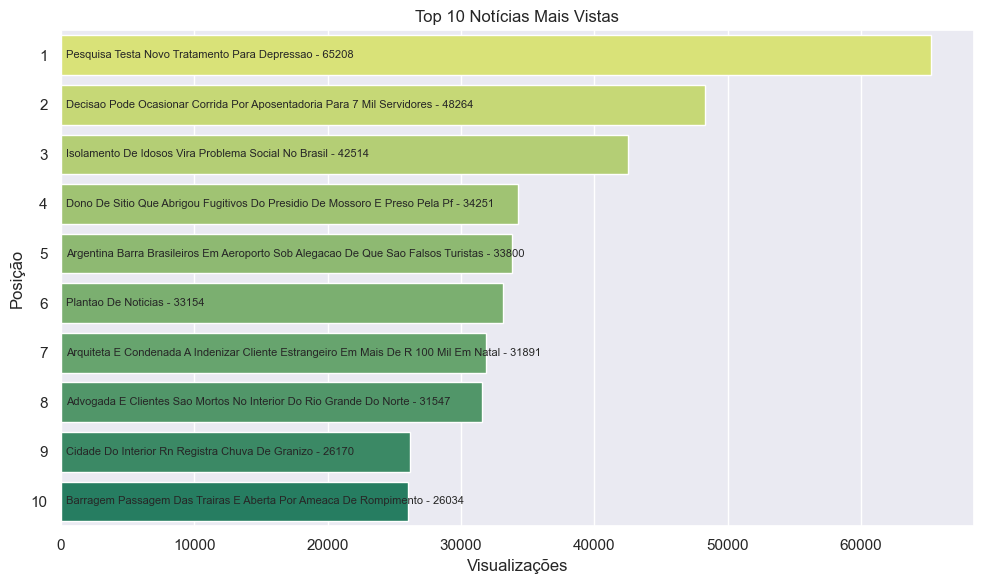

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''
LINK: https://analytics.google.com/

https://analytics.google.com/analytics/web/#/p308444970/reports/explorer?params=_u..nav%3Dmaui&r=all-pages-and-screens&ruid=all-pages-and-screens,life-cycle,engagement&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Engajamento (dropdown) > Páginas e telas

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

# Ler o DataFrame diretamente do arquivo CSV, começando da linha 10
df = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\top10.csv', skiprows=9)

# Filtrar apenas as linhas que representam notícias
df = df[df['Caminho da página e classe da tela'].str.contains('-')]

# Ordenar o DataFrame pelas visualizações e pegar as 10 primeiras
df = df.sort_values(by='Visualizações', ascending=False).head(10)

# Extrair os nomes das notícias sem caracteres especiais
df['Noticia'] = df['Caminho da página e classe da tela'].apply(lambda x: x.split('/')[-2].replace('-', ' ')).str.title()

df['Texto'] = df['Noticia'] + ' - ' + df['Visualizações'].astype(str)

# Criar o gráfico de barras horizontais com o tema do Seaborn
sns.set_theme()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Visualizações', y='Noticia', data=df, hue='Noticia', palette='summer_r')

# # Adicionar os rótulos (números de visualizações) diretamente nas barras
# ax.bar_label(ax.containers[0], fmt='%g', label_type='edge', fontsize=8, color='black')

# Adicionar os rótulos (números de visualizações e nomes das notícias) diretamente nas barras
for i, (value, name) in enumerate(zip(df['Visualizações'], df['Noticia'])):
    ax.text(int(df['Visualizações'][3])*0.006, i, f'{name} - {value}', va='center', ha='left', fontsize=8)


# Modificar os ticks do eixo Y para números de 1 a 10
ax.set_yticks(range(10))
ax.set_yticklabels(range(1, 11))

# # Adicionar os nomes das notícias no início das barras
# for bar, label in zip(bars, df['Texto']):
#     plt.text(0, bar.get_y() + bar.get_height() / 2, label, va='center', ha='left', fontsize=8)


plt.xlabel('Visualizações')
plt.ylabel('Posição')
plt.title('Top 10 Notícias Mais Vistas')

plt.tight_layout()
plt.show()

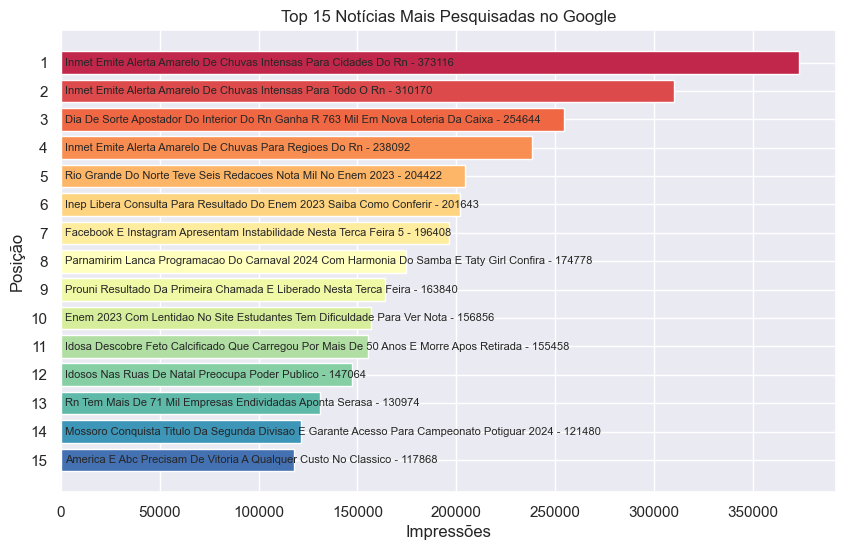

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''
LINK: https://analytics.google.com/

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-acquisition-overview&ruid=lifecycle-acquisition-overview,life-cycle,acquisition&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Aquisição (dropdown) > Visão geral

Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

# Nome do arquivo CSV
nome_arquivo = r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\top15.csv'

# Lê o arquivo CSV, ignorando linhas com problemas
#df = pd.read_csv(nome_arquivo, encoding='utf-8', skiprows=8)

import csv

def encontrar_frase_em_csv(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-8') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

# Substitua 'Impressões orgânicas da Pesquisa Google' pela frase que você está procurando
frase_procurada = 'Impressões orgânicas da Pesquisa Google'
nome_arquivo = r'C:\Users\Usuario\Documents\Repositórios\csv\TNsemanal\top15.csv'

numero_linha_encontrada = encontrar_frase_em_csv(nome_arquivo, frase_procurada)

# Ler o DataFrame diretamente do arquivo CSV, começando da linha 10
df = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNsemanal\top15.csv', skiprows = numero_linha_encontrada-1)

# Filtrar apenas as linhas que representam notícias
#df = df[df['Página de destino + string de consulta'].str.contains('-')& ~df['Página de destino + string de consulta'].str.contains('/quem-somos/')]

excluded_keywords = ['/quem-somos/', '/plantao-de-noticias/','/colunas/','/alex-medeiros/']
df = df[df['Página de destino + string de consulta'].str.contains('-') & ~df['Página de destino + string de consulta'].str.contains('|'.join(excluded_keywords))]

df['Impressões orgânicas da Pesquisa Google'] = pd.to_numeric(df['Impressões orgânicas da Pesquisa Google'], errors='coerce')

# Ordenar o DataFrame pelas visualizações e pegar as 10 primeiras
df = df.sort_values(by='Impressões orgânicas da Pesquisa Google', ascending=False).head(15)

# Extrair os nomes das notícias sem caracteres especiais
df['Noticia'] = df['Página de destino + string de consulta'].apply(lambda x: x.split('/')[-2].replace('-', ' ')).str.title()

# Criar uma coluna combinada de Noticia e Visualizações
df['Texto'] = df['Noticia'] + ' - ' + df['Impressões orgânicas da Pesquisa Google'].astype(str)

# Criar o gráfico de barras horizontais com o tema do Seaborn
sns.set_theme()
plt.figure(figsize=(10, 6))
bars = plt.barh(range(1, 16), df['Impressões orgânicas da Pesquisa Google'], color=sns.color_palette('Spectral', n_colors=15))

# Adicionar os nomes das notícias no início das barras
# APARENTE ERRO EM df['Impressões orgânicas da Pesquisa Google'][5]
# Número relacionado as linhas do df. Quantas deve pular até achar a inicial.
# Não tinha esse problema antes, apenas com relatorio semanal
for bar, label in zip(bars, df['Texto']):
    plt.text(int(df['Impressões orgânicas da Pesquisa Google'][7])*0.006, bar.get_y() + bar.get_height() / 2, label, va='center', ha='left', fontsize=8)

plt.xlabel('Impressões')
plt.title('Top 15 Notícias Mais Pesquisadas no Google')
plt.yticks(range(1, 16), range(1, 16))  # Numerar as barras no eixo Y de 1 a 10
plt.ylabel('Posição')
plt.gca().invert_yaxis()  # Inverter a ordem para exibir a mais vista no topo
plt.show()

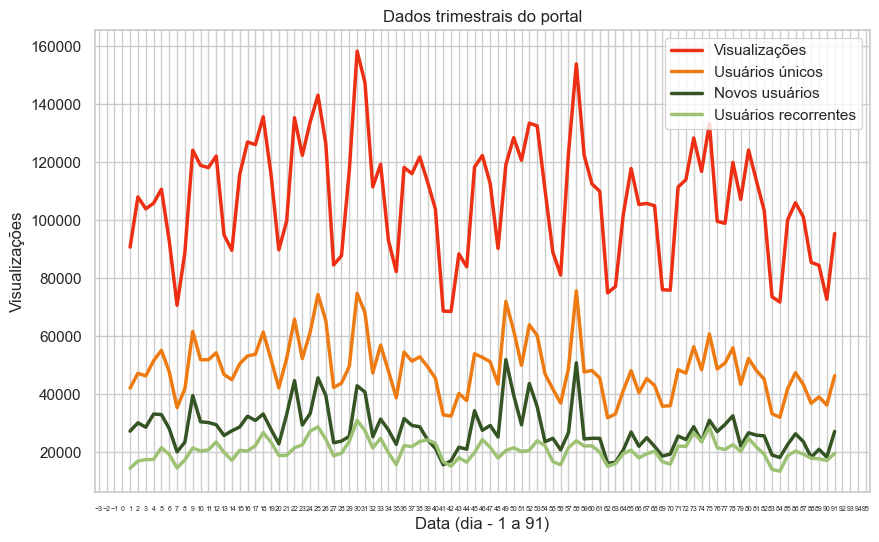

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

'''
LINK: https://analytics.google.com/

USUÁRIOS E NOVOS USUÁRIOS

https://analytics.google.com/analytics/web/#/p308444970/reports/reportinghub?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130

CAMINHO: barra lateral > Relatórios

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

'''
LINK: https://analytics.google.com/

VISUALIZAÇÕES

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-engagement-overview&ruid=lifecycle-engagement-overview,life-cycle,engagement&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Engajamento (dropdown) > Visão geral

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

'''
LINK: https://analytics.google.com/

NOVOS USUÁRIOS E USUÁRIOS RECORRENTES

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-retention-overview&ruid=lifecycle-retention-overview,life-cycle,retention&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Retenção

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

PEGAR  O VALOR DE USUÁRIOS RECORRENTE POR SCRAPPING, DIRETO DO ANALYTICS, POIS OS VALORES DE LA PROVAVELMENT SÃO DE USUÁRIOS UNICOS.

'''

import csv

def encontrar_frase_em_csv(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-8') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

def remover_ultima_linha(arquivo):
    dados = arquivo
    
    # Verificar se a última linha atende ao critério
    ultima_linha = dados.iloc[-1]
    if ultima_linha['Nº dia'] not in ['0030', '0029', '0028', '28', '29', '30']:
        # Se não atender ao critério, remover a última linha
        dados = dados.iloc[:-1]

    return dados

def transforma_int(arquivo):
    
    for i in range(len(arquivo.iloc[:,0])):
        arquivo.iloc[i,0] = int(arquivo.iloc[i,0])
    
    for i in range(len(arquivo.iloc[:,1])):
        arquivo.iloc[i,1] = int(arquivo.iloc[i,1])
    
    return arquivo

# USUÁRIO ÚNICOS
usuarios_unicos_final = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\uniNovos.csv', 'Novos usuários')

usuarios_unicos = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\uniNovos.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos = remover_ultima_linha(usuarios_unicos)
usuarios_unicos = transforma_int(usuarios_unicos)

usuarios_unicos['Nº dia'] = usuarios_unicos['Nº dia']+1


# NOVOS USUÁRIOS
novos_usuarios_final = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\uniNovos.csv', 'Tempo médio de engajamento')

novos_usuarios = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\uniNovos.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-105).dropna()

novos_usuarios = remover_ultima_linha(novos_usuarios)
novos_usuarios = transforma_int(novos_usuarios)

novos_usuarios['Nº dia'] = novos_usuarios['Nº dia']+1


# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\visualizacoes.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\visualizacoes.csv', 'Contagem de eventos')

visualizacoes = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\visualizacoes.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-296).dropna()

visualizacoes = remover_ultima_linha(visualizacoes)
visualizacoes = transforma_int(visualizacoes)

visualizacoes['Nº dia'] = visualizacoes['Nº dia']+1


# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\novosRec.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\novosRec.csv', 'Dia 1')

usuarios_recorrentes = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\novosRec.csv', skiprows=recorrentes_inicio-1, nrows=92)

usuarios_recorrentes = remover_ultima_linha(usuarios_recorrentes)
usuarios_recorrentes = transforma_int(usuarios_recorrentes)

usuarios_recorrentes['Nº dia'] = usuarios_recorrentes['Nº dia']+1
#CORRIGIR ERRO COM OS RECORRENTES NÃO ESTA PEGANDO OS 7 APENAS 6

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Visualizações", data=visualizacoes, label="Visualizações", linewidth=2.5, color=cores[2])
sns.lineplot(x="Nº dia", y="Usuários", data=usuarios_unicos, label="Usuários únicos", linewidth=2.5, color=cores[0])
sns.lineplot(x="Nº dia", y="Novos usuários", data=novos_usuarios, label="Novos usuários", linewidth=2.5, color=cores[1])
sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes, label="Usuários recorrentes", linewidth=2.5, color=cores[3])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data (dia - 1 a 91)")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Dados trimestrais do portal")
plt.xticks(fontsize=5)
#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

'''
LINK: https://analytics.google.com/

USUÁRIOS E NOVOS USUÁRIOS

https://analytics.google.com/analytics/web/#/p308444970/reports/reportinghub?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130

CAMINHO: barra lateral > Relatórios

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

'''
LINK: https://analytics.google.com/

VISUALIZAÇÕES

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-engagement-overview&ruid=lifecycle-engagement-overview,life-cycle,engagement&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Engajamento (dropdown) > Visão geral

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

'''
LINK: https://analytics.google.com/

NOVOS USUÁRIOS E USUÁRIOS RECORRENTES

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-retention-overview&ruid=lifecycle-retention-overview,life-cycle,retention&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Retenção

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

PEGAR  O VALOR DE USUÁRIOS RECORRENTE POR SCRAPPING, DIRETO DO ANALYTICS, POIS OS VALORES DE LA PROVAVELMENT SÃO DE USUÁRIOS UNICOS.

'''

import csv

def encontrar_frase_em_csv(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-8') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

def remover_ultima_linha(arquivo):
    dados = arquivo
    
    # Verificar se a última linha atende ao critério
    ultima_linha = dados.iloc[-1]
    if ultima_linha['Nº dia'] not in ['0030', '0029', '0028', '28', '29', '30']:
        # Se não atender ao critério, remover a última linha
        dados = dados.iloc[:-1]

    return dados

def transforma_int(arquivo):
    
    for i in range(len(arquivo.iloc[:,0])):
        arquivo.iloc[i,0] = int(arquivo.iloc[i,0])
    
    for i in range(len(arquivo.iloc[:,1])):
        arquivo.iloc[i,1] = int(arquivo.iloc[i,1])
    
    return arquivo

# USUÁRIO ÚNICOS
usuarios_unicos_final = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\uniNovos.csv', 'Novos usuários')

usuarios_unicos = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\uniNovos.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos = remover_ultima_linha(usuarios_unicos)
usuarios_unicos = transforma_int(usuarios_unicos)

usuarios_unicos['Nº dia'] = usuarios_unicos['Nº dia']+1


# NOVOS USUÁRIOS
novos_usuarios_final = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\uniNovos.csv', 'Tempo médio de engajamento')

novos_usuarios = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\uniNovos.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-105).dropna()

novos_usuarios = remover_ultima_linha(novos_usuarios)
novos_usuarios = transforma_int(novos_usuarios)

novos_usuarios['Nº dia'] = novos_usuarios['Nº dia']+1


# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\visualizacoes.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\visualizacoes.csv', 'Contagem de eventos')

visualizacoes = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\visualizacoes.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-296).dropna()

visualizacoes = remover_ultima_linha(visualizacoes)
visualizacoes = transforma_int(visualizacoes)

visualizacoes['Nº dia'] = visualizacoes['Nº dia']+1


# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\novosRec.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\novosRec.csv', 'Dia 1')

usuarios_recorrentes = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\novosRec.csv', skiprows=recorrentes_inicio-1, nrows=92)

usuarios_recorrentes = remover_ultima_linha(usuarios_recorrentes)
usuarios_recorrentes = transforma_int(usuarios_recorrentes)

usuarios_recorrentes['Nº dia'] = usuarios_recorrentes['Nº dia']+1

#TOTAL

usuario_unicos_total = usuarios_unicos['Usuários'].sum().astype('int')

novos_usuarios_total = novos_usuarios['Novos usuários'].sum()

visualizacoes_total = visualizacoes['Visualizações'].sum()

usuarios_recorrentes_total = usuarios_recorrentes['Usuários recorrentes'].sum().astype('int')

usuarios_recorrentes_total

print(usuario_unicos_total)
print(usuarios_recorrentes_total)
print(visualizacoes_total)
print(novos_usuarios_total)


4440157
1861736
9770416
2514927


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\789645042.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Faixa Etária', y='Visualizações', data=df, palette="magma")
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.ge

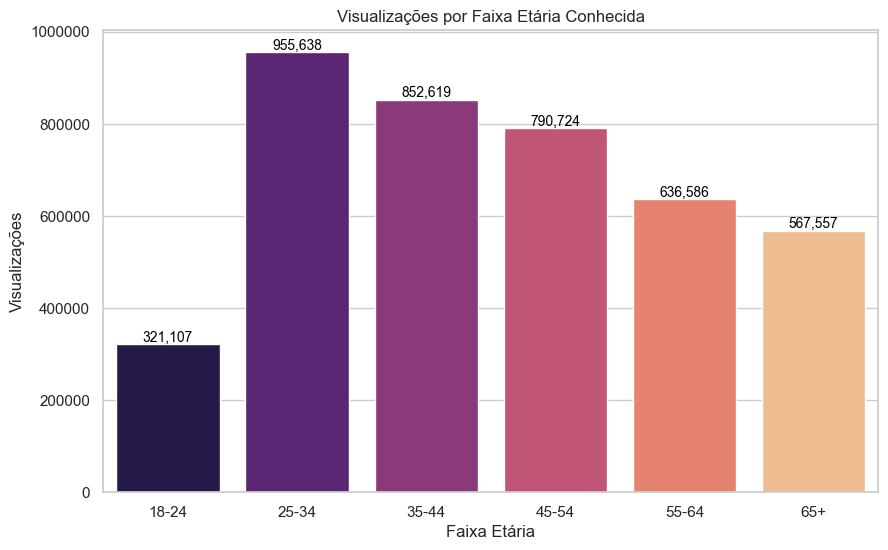

In [15]:
'''
LINK: https://analytics.google.com/

VISUALIZAÇÕES POR FAIXA ETÁRIA

https://analytics.google.com/analytics/web/#/analysis/p308444970/edit/SPUMRb6cSOur-ylh_X1_Qw

CAMINHO: barra lateral > Analisar > 'visualizações por faixa etária'

Ações: Exportar dados (icone de download - superior direito) >>> Planilhas google >>> nova guia >>> Import the data (batão)>>> Arquivo >>> Fazer download >>> Valores separados por vírgula (.csv)

'''
def transforma_int_coluna(arquivo):
    for i in range(len(arquivo.iloc[1,:])):
        arquivo.iloc[1,i] = int(arquivo.iloc[1,i])
    
    return arquivo

visualizacoes_faixa_etaria = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\download.csv', skiprows=6, encoding='utf-8')


visualizacoes_faixa_etaria = visualizacoes_faixa_etaria.iloc[0:2,1:-1]
#visualizacoes_faixas_etarias_conhecidas = visualizacoes_faixa_etaria.iloc[1,2:-2]

visualizacoes_faixa_etaria = transforma_int_coluna(visualizacoes_faixa_etaria)

fe_1824 = visualizacoes_faixa_etaria['18-24'][1]
fe_2534 = visualizacoes_faixa_etaria['25-34'][1]
fe_3544 = visualizacoes_faixa_etaria['35-44'][1]
fe_4554 = visualizacoes_faixa_etaria['45-54'][1]
fe_5564 = visualizacoes_faixa_etaria['55-64'][1]
fe_65 = visualizacoes_faixa_etaria['65+'][1]

# Dados
faixas_etarias = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
visualizacoes = [fe_1824, fe_2534, fe_3544, fe_4554, fe_5564, fe_65]

# Criar um DataFrame com os dados
import pandas as pd
df = pd.DataFrame({'Faixa Etária': faixas_etarias, 'Visualizações': visualizacoes})

# Configurar o estilo seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Faixa Etária', y='Visualizações', data=df, palette="magma")

# Adicionar rótulos diretamente acima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Faixa Etária')
plt.ylabel('Visualizações')
plt.title('Visualizações por Faixa Etária Conhecida')

# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='y', style='plain')

# Mostrar o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\3067419239.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Faixa Etária', y='Visualizações', data=df, palette="magma")
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

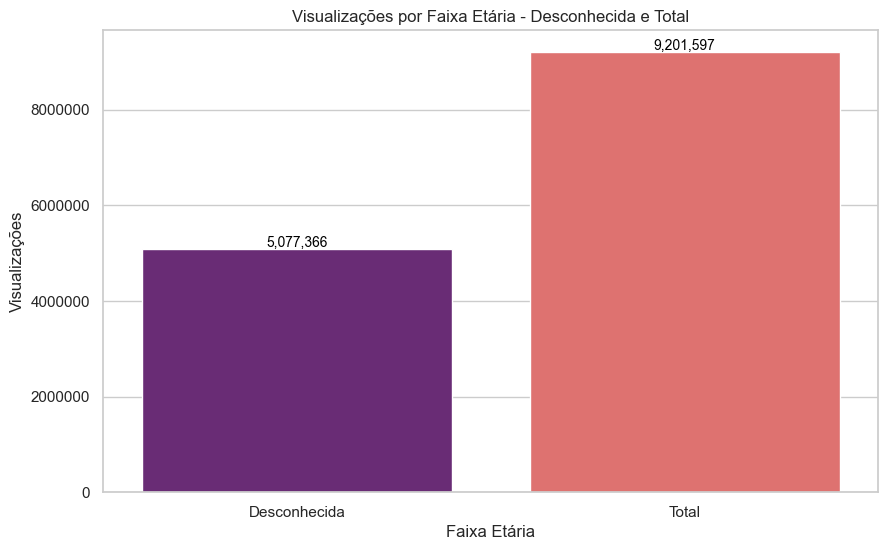

In [16]:
'''
LINK: https://analytics.google.com/

VISUALIZAÇÕES POR FAIXA ETÁRIA

https://analytics.google.com/analytics/web/#/analysis/p308444970/edit/SPUMRb6cSOur-ylh_X1_Qw

CAMINHO: barra lateral > Analisar > 'visualizações por faixa etária'

Ações: Exportar dados (icone de download - superior direito) >>> Planilhas google >>> nova guia >>> Import the data (batão)>>> Arquivo >>> Fazer download >>> Valores separados por vírgula (.csv)

'''
#dados já tratados na celula anterior


fe_deconhecida = visualizacoes_faixa_etaria['unknown'][1]
fe_total = visualizacoes_faixa_etaria['Totais'][1]


# Dados
faixas_etarias = ['Desconhecida', 'Total']
visualizacoes = [fe_deconhecida, fe_total]

# Criar um DataFrame com os dados
import pandas as pd
df = pd.DataFrame({'Faixa Etária': faixas_etarias, 'Visualizações': visualizacoes})

# Configurar o estilo seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Faixa Etária', y='Visualizações', data=df, palette="magma")

# Adicionar rótulos diretamente acima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Faixa Etária')
plt.ylabel('Visualizações')
plt.title('Visualizações por Faixa Etária - Desconhecida e Total')

# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='y', style='plain')

# Mostrar o gráfico
plt.show()

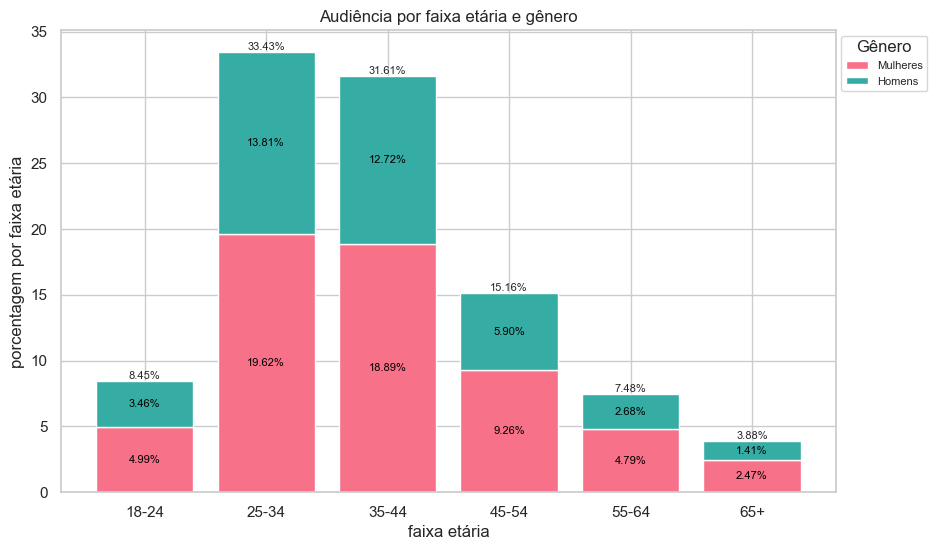

In [14]:
'''
https://business.facebook.com

https://business.facebook.com/latest/insights/people?asset_id=146958865328939&ad_account_id=23862053469140633&entity_type=FB_PAGE

CAMINHO: Insights (barra lateral) >>> Público (menu lateral) >>> 

Ações: Exportar (dropdown) >>> Exportar como csv
'''

idade = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Público.csv", skiprows= 10, encoding='utf-16')

idade2 = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Público.csv", skiprows= 10, encoding='utf-16')

idadeFB = idade2[0:6]

idade['m_fb'] = idadeFB['Mulheres'].apply(lambda x: x.split('%')[-2].replace(',', '.')).astype('float')
idade['h_fb'] = idadeFB['Homens'].apply(lambda x: x.split('%')[-2].replace(',', '.')).astype('float')

idade3 = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Público.csv", skiprows= 19, encoding='utf-16')

idadeIG = idade3.iloc[0:6]

idade['m_ig'] = idadeIG['Mulheres'].apply(lambda x: x.split('%')[-2].replace(',', '.')).astype('float')
idade['h_ig'] = idadeIG['Homens'].apply(lambda x: x.split('%')[-2].replace(',', '.')).astype('float')

followersFB = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Público.csv", skiprows= 1, encoding='utf-16', delimiter=';')

FB_followers = followersFB[1:2]

FB_followers  = int(FB_followers['Seguidores no Facebook'][1])

followersIG = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Público.csv", skiprows= 5, encoding='utf-16', delimiter=';')

IG_followers = followersIG[1:2]

IG_followers = int(IG_followers['Seguidores do Instagram'][1])

# Calcula os totais das colunas de homens e mulheres,
idade['t_h'] = ((FB_followers * idade['h_fb']) + (IG_followers * idade['h_ig'])) / (FB_followers+IG_followers)

idade['t_m'] = ((FB_followers * idade['m_fb']) + (IG_followers * idade['m_ig'])) / (FB_followers+IG_followers)

# Reorganização da estrutura dos dados usando a função melt
melted_data = pd.melt(idade, id_vars=['Idade'], value_vars=['t_m', 't_h'])

# Cria o gráfico usando matplotlib
plt.figure(figsize=(10, 6))

# Escolhe uma paleta de cores do seaborn (pode ser alterada conforme desejado)
colors = sns.color_palette("husl", 2)

# Gera o gráfico de barras empilhadas com cores personalizadas
bottom = None
for i, gender in enumerate(melted_data['variable'].unique()):
    subset = melted_data[melted_data['variable'] == gender]
    plt.bar(subset['Idade'], subset['value'], label=gender, bottom=bottom, color=colors[i])
    if bottom is None:
        bottom = subset['value']
    else:
        bottom += subset['value']

# Adiciona rótulos e títulos ao gráfico
plt.xlabel('faixa etária')
plt.ylabel('porcentagem por faixa etária')
plt.title('Audiência por faixa etária e gênero')

# Adiciona rótulos no meio das barras
for age, t_m, t_h in zip(idade['Idade'][0:6], idade['t_m'], idade['t_h']):
    plt.text(age, t_m / 2, f'{t_m:.2f}%', ha='center', va='center', fontsize=8, color='black')
    plt.text(age, t_m + t_h / 2, f'{t_h:.2f}%', ha='center', va='center', fontsize=8, color='black')

# Adiciona rótulos nos topos das barras
for age, t_m, t_h in zip(idade['Idade'][0:6], idade['t_m'], idade['t_h']):
    plt.text(age, t_m + t_h, f'{t_m + t_h:.2f}%', ha='center', va='bottom', fontsize=8)

# Adiciona a legenda com cores personalizadas
legend_labels = ['Mulheres', 'Homens']
plt.legend(title="Gênero", labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)

# Exibe o gráfico
plt.show()

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


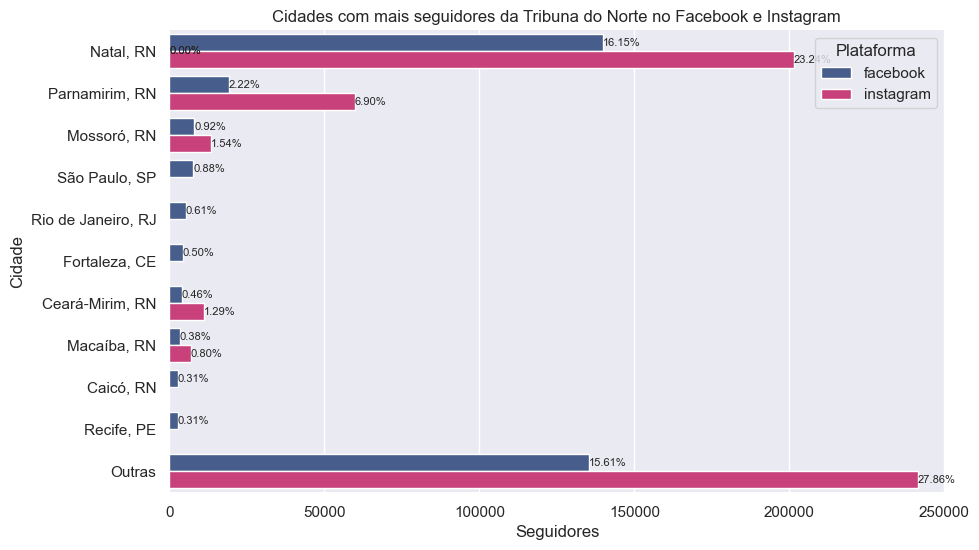

In [19]:
'''
https://business.facebook.com

https://business.facebook.com/latest/insights/people?asset_id=146958865328939&ad_account_id=23862053469140633&entity_type=FB_PAGE

CAMINHO: Insights (barra lateral) >>> Público (menu lateral) >>> 

Ações: Exportar (dropdown) >>> Exportar como csv
'''

cidadesFB = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Público.csv", skiprows=28, encoding='utf-16')

cidadesFB = cidadesFB.iloc[0:10]

cidadesFB['Valor'] = cidadesFB['Valor'].apply(lambda x: x.split('%')[-2].replace(',', '.')).astype('float')

cidadesIG = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Público.csv", skiprows=41, encoding='utf-16')

cidadesIG = cidadesIG.iloc[0:5]

cidadesIG['Valor'] = cidadesIG['Valor'].apply(lambda x: x.split('%')[-2].replace(',', '.')).astype('float')

followersFB = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Público.csv", skiprows= 1, encoding='utf-16', delimiter=';')

FB_followers = followersFB[1:2]

FB_followers  = int(FB_followers['Seguidores no Facebook'][1])

followersIG = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Público.csv", skiprows= 5, encoding='utf-16', delimiter=';')

IG_followers = followersIG[1:2]

IG_followers = int(IG_followers['Seguidores do Instagram'][1])

cidades = pd.DataFrame({
    'cidade': cidadesFB['Principais cidades'],
    'facebook': cidadesFB['Valor'],
    'instagram': [np.nan] * len(cidadesFB['Valor'])
})

#cidades['instagram'].fillna(np.nan)

for citys,valor in zip(cidadesIG['Principais cidades'],cidadesIG['Valor']):
    numero_linha = cidadesFB.index[cidadesFB['Principais cidades'] == citys].tolist()[0]
    # cidades['instagram'][numero_linha] = cidadesIG['Valor'][numero_linha]
    cidades.loc[cidades['cidade'] == citys, 'instagram'] = valor

cidades.loc[len(cidades)] = {'cidade':'Outras', 'facebook': abs(cidades['facebook'].sum()-100), 'instagram': abs(cidades['instagram'].sum()-100)}

cidades['facebook'] = cidades['facebook']*FB_followers/100
cidades['instagram'] = cidades['instagram']*IG_followers/100

# Total de seguidores
total_fb = cidades['facebook'].sum(skipna=True)
total_ig = cidades['instagram'].sum(skipna=True)
total = total_fb + total_ig

# Criar gráfico
sns.set(style="darkgrid") # Define o estilo do seaborn
plt.figure(figsize=(10, 6))

# Mapeamento de cores
# cor_fb = sns.color_palette("#3b5998")
# cor_ig = sns.color_palette("#DF2A77")

# Plotagem
sns.barplot(data=pd.melt(cidades, id_vars='cidade'), x='value', y='cidade', hue='variable', dodge=True, palette={  'instagram': '#DF2A77','facebook': '#3b5998' })

# Adicionar percentuais
for i, p in enumerate(plt.gca().patches):
    percentage = 100 * p.get_width() / total
    plt.text(p.get_x() + p.get_width() + 0.02, p.get_y() + p.get_height() / 2, f"{percentage:.2f}%", ha='left', va='center', size=8)

# Ajustes estéticos
plt.title('Cidades com mais seguidores da Tribuna do Norte no Facebook e Instagram')
plt.xlabel('Seguidores')
plt.ylabel('Cidade')
plt.xlim(0, 250000)
plt.legend(title='Plataforma')
sns.despine(left=True, bottom=True)

# Exibir gráfico
plt.show()

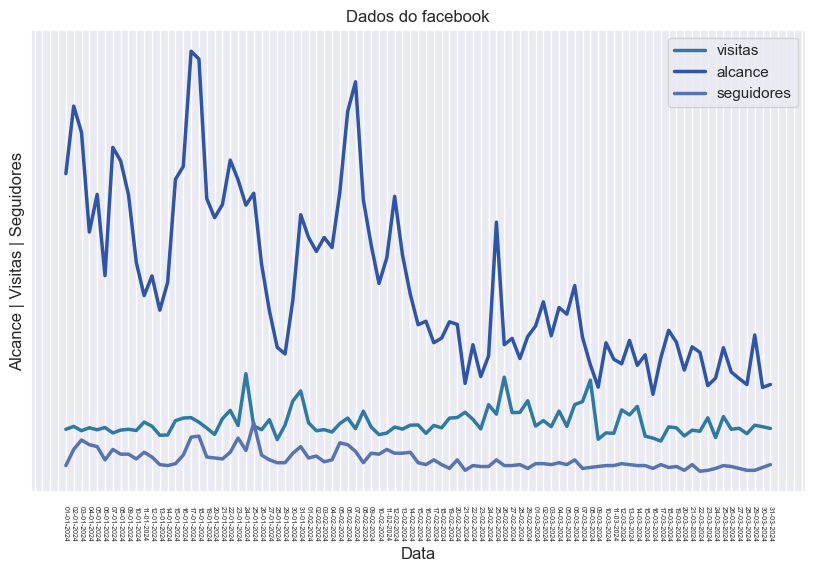

In [26]:
'''
https://business.facebook.com

https://business.facebook.com/latest/insights/results?asset_id=146958865328939&ad_account_id=23862053469140633&entity_type=FB_PAGE

CAMINHO: Insights (barra lateral) >>> Resultados (menu lateral) >>> 

Ações: Exportar (3 dropdown) >>> Exportar como csv
'''
import csv

def encontrar_frase_em_csv_meta(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-16') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

# ALCANCE
final_alcanceFB = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Alcance.csv', 'Alcance do Instagram')
inicio_alcanceFB = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Alcance.csv', 'Alcance no Facebook')

alcanceFB = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Alcance.csv', skiprows=inicio_alcanceFB, encoding='utf-16', skip_blank_lines=True,nrows=final_alcanceFB-4).dropna()
#alcanceFB = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Alcance.csv', skiprows=inicio_alcanceFB, encoding='utf-16', skip_blank_lines=True).dropna().iloc[0:7]

alcanceFB['Data'] = pd.to_datetime(alcanceFB['Data']).dt.strftime('%d-%m-%Y')

# VISITAS
final_visitasFB = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Visitas.csv', 'Visitas ao perfil do Instagram')

visitasFB = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Visitas.csv', skiprows=2, encoding='utf-16', skip_blank_lines=True, nrows=final_visitasFB-4).dropna()

visitasFB['Data'] = pd.to_datetime(visitasFB['Data']).dt.strftime('%d-%m-%Y')

visitasFB['Primary'] = visitasFB['Primary']*10

# CURTIDAS
final_seguidoresFB = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Seguidores.csv', 'Seguidos no Instagram')

seguidoresFB = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Seguidores.csv', skiprows=2, encoding='utf-16', skip_blank_lines=True, nrows=final_seguidoresFB-4).dropna()

seguidoresFB['Data'] = pd.to_datetime(seguidoresFB['Data']).dt.strftime('%d-%m-%Y')

seguidoresFB['Primary'] = seguidoresFB['Primary']*200

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#5874af", "#2F79A3", "#2f55a4"]

# Plotando o gráfico de linhas
#sns.lineplot(x="Data", y="Novas curtidas da Página do Facebook", data=seguidoresFB, label="seguidores", linewidth=2.5, color=cores[0])
sns.lineplot(x="Data", y="Primary", data=visitasFB, label="visitas", linewidth=2.5, color=cores[1])
sns.lineplot(x="Data", y="Primary", data=alcanceFB, label="alcance", linewidth=2.5, color=cores[2])
sns.lineplot(x="Data", y="Primary", data=seguidoresFB, label="seguidores", linewidth=2.5, color=cores[0])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize = 5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Dados do facebook")

plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()


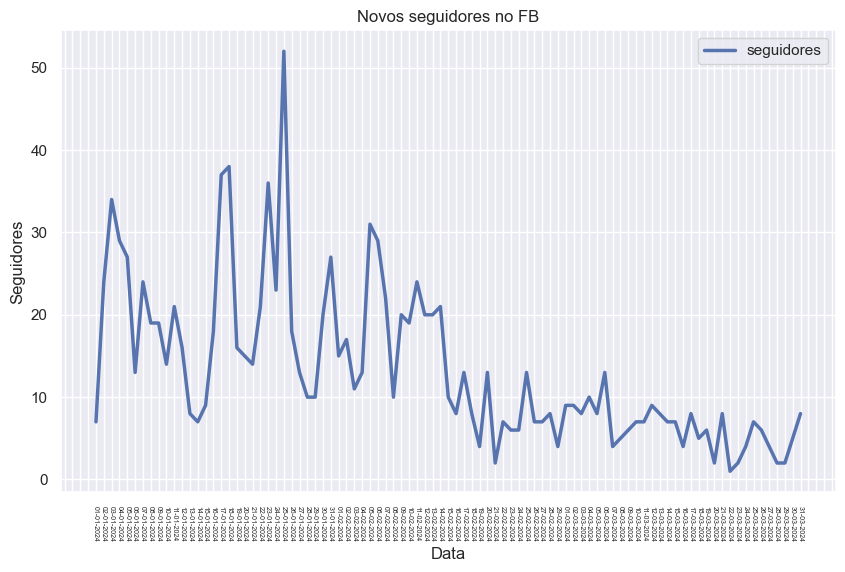

In [29]:
# CURTIDAS
final_seguidoresFB = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Seguidores.csv', 'Seguidos no Instagram')

seguidoresFB = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Seguidores.csv', skiprows=2, encoding='utf-16', skip_blank_lines=True, nrows=final_seguidoresFB-4).dropna()

seguidoresFB['Data'] = pd.to_datetime(seguidoresFB['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#5874af", "#E1306C", "#FCAF45"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=seguidoresFB, label="seguidores", linewidth=2.5, color=cores[0])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize = 5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Seguidores")
plt.title("Novos seguidores no FB")

plt.legend()

# Exibindo o gráfico
plt.show()

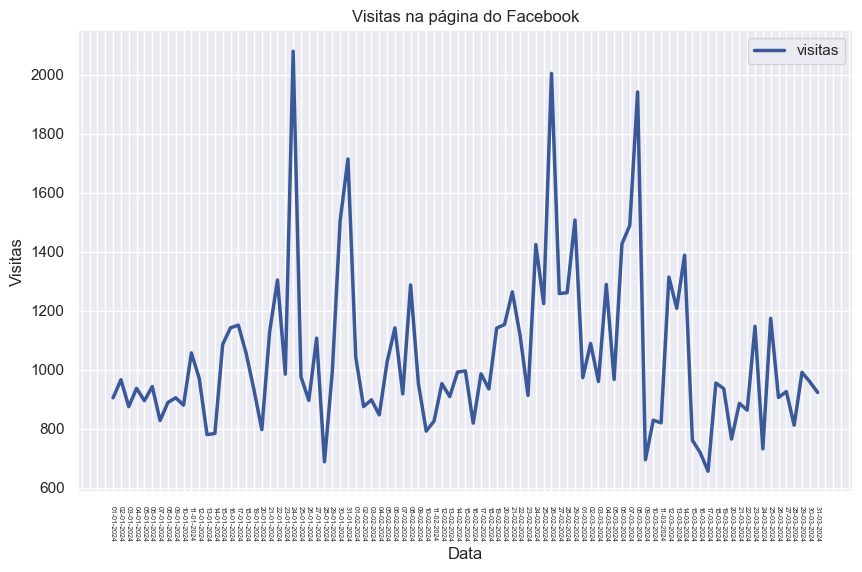

In [30]:
final_visitasFB = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Visitas.csv', 'Visitas ao perfil do Instagram')

visitasFB = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Visitas.csv', skiprows=2, encoding='utf-16', skip_blank_lines=True, nrows=final_visitasFB-4).dropna()

visitasFB['Data'] = pd.to_datetime(visitasFB['Data']).dt.strftime('%d-%m-%Y')
# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#5874af", "#3b5998", "#2f55a4"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=visitasFB, label="visitas", linewidth=2.5, color=cores[1])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize=5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Visitas")
plt.title("Visitas na página do Facebook")

# Ajustar os rótulos do eixo Y para valores correspondentes
# plt.yticks(range(0, max(int(visitasFB["Curtidas na Página do Facebook"])), 100))

plt.legend()

# Exibindo o gráfico
plt.show()

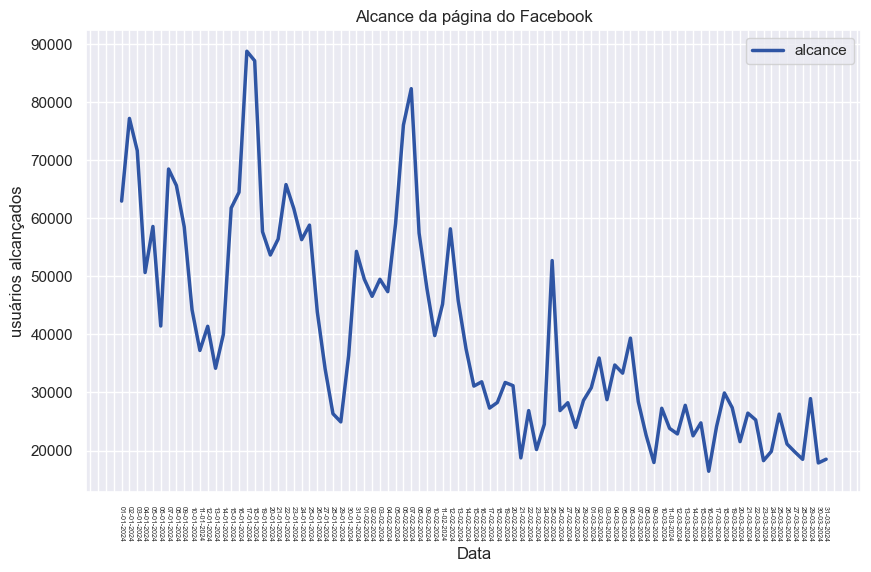

In [31]:
final_alcanceFB = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNsemanal\Alcance.csv', 'Alcance do Instagram')

inicio_alcanceFB = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNsemanal\Alcance.csv', 'Alcance no Facebook')

alcanceFB = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNsemanal\Alcance.csv', skiprows=inicio_alcanceFB, encoding='utf-16', skip_blank_lines=True, nrows=final_alcanceFB-4).dropna()

alcanceFB['Data'] = pd.to_datetime(alcanceFB['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#5874af", "#3b5998", "#2f55a4"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=alcanceFB, label="alcance", linewidth=2.5, color=cores[2])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize=5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("usuários alcançados")
plt.title("Alcance da página do Facebook")

plt.legend()

# Exibindo o gráfico
plt.show()

2


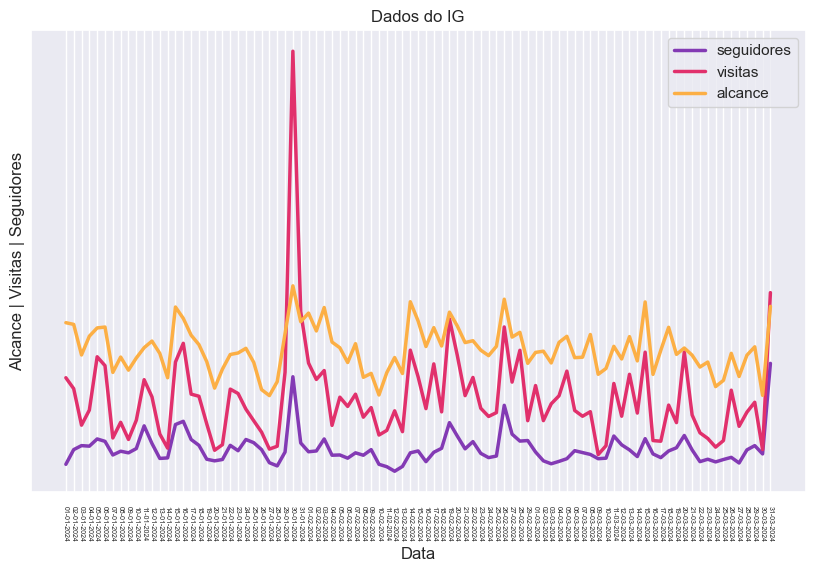

In [32]:
'''
https://business.facebook.com

https://business.facebook.com/latest/insights/results?asset_id=146958865328939&ad_account_id=23862053469140633&entity_type=FB_PAGE

CAMINHO: Insights (barra lateral) >>> Resultados (menu lateral) >>> 

Ações: Exportar (3 dropdown) >>> Exportar como csv
'''
import csv

def encontrar_frase_em_csv_meta(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-16') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

# ALCANCE
#final_alcanceIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Alcance.csv', 'Alcance no Facebook')
inicio_alcanceIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Alcance.csv', 'Alcance do Instagram')

alcanceIG = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Alcance.csv', skiprows=inicio_alcanceIG, encoding='utf-16', skip_blank_lines=True) #, nrows=final_alcanceIG-5

alcanceIG['Data'] = pd.to_datetime(alcanceIG['Data']).dt.strftime('%d-%m-%Y')

# VISITAS
inicio_visitasIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Visitas.csv', 'Visitas ao perfil do Instagram')

visitasIG = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Visitas.csv', skiprows=inicio_visitasIG, encoding='utf-16', skip_blank_lines=True)

visitasIG['Data'] = pd.to_datetime(visitasIG['Data']).dt.strftime('%d-%m-%Y')

visitasIG['Primary'] = visitasIG['Primary']*30

# SEGUIDORES
inicio_seguidoresIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Seguidores.csv', 'Seguidos no Instagram')

final_segIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Seguidores.csv', 'Seguidores')
print(final_segIG)
seguidoresIG = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Seguidores.csv', skiprows=inicio_seguidoresIG, encoding='utf-16', skip_blank_lines=True).dropna()

seguidoresIG['Data'] = pd.to_datetime(seguidoresIG['Data']).dt.strftime('%d-%m-%Y')

seguidoresIG['Primary'] = seguidoresIG['Primary']*350


# social_media_data['Data'] = pd.to_datetime(social_media_data['Data'])
# social_media_data['Seguidores'] = social_media_data['Seguidores']*200
# social_media_data['Seguidores do Instagram'] = social_media_data['Seguidores do Instagram']*20

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#833AB4", "#E1306C", "#FCAF45"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=seguidoresIG, label="seguidores", linewidth=2.5, color=cores[0])
sns.lineplot(x="Data", y="Primary", data=visitasIG, label="visitas", linewidth=2.5, color=cores[1])
sns.lineplot(x="Data", y="Primary", data=alcanceIG, label="alcance", linewidth=2.5, color=cores[2])

# Ajustando o intervalo entre as datas no eixo x
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize=5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Dados do IG")

plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

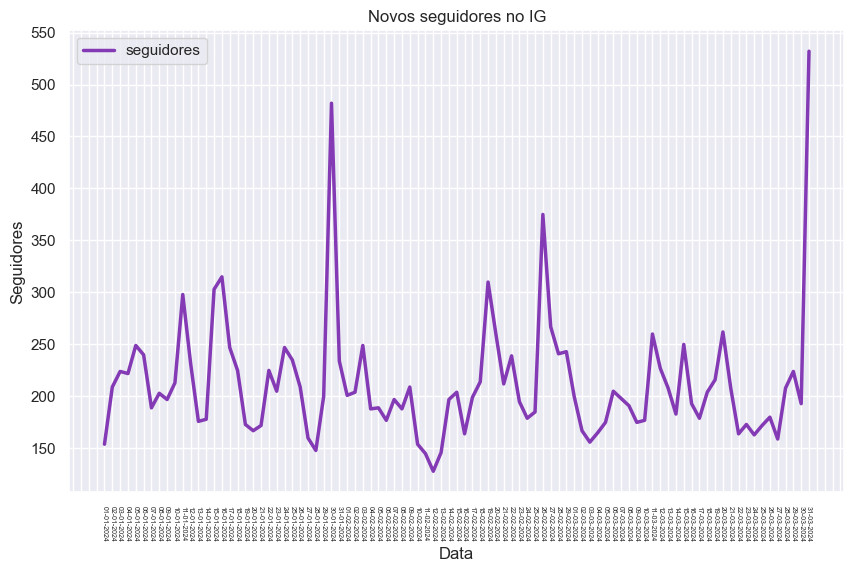

In [34]:
inicio_seguidoresIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Seguidores.csv', 'Seguidos no Instagram')

seguidoresIG = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Seguidores.csv', skiprows=inicio_seguidoresIG, encoding='utf-16', skip_blank_lines=True)

seguidoresIG['Data'] = pd.to_datetime(seguidoresIG['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#833AB4", "#E1306C", "#FCAF45"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=seguidoresIG, label="seguidores", linewidth=2.5, color=cores[0])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize=5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Seguidores")
plt.title("Novos seguidores no IG")

plt.legend()

# Exibindo o gráfico
plt.show()

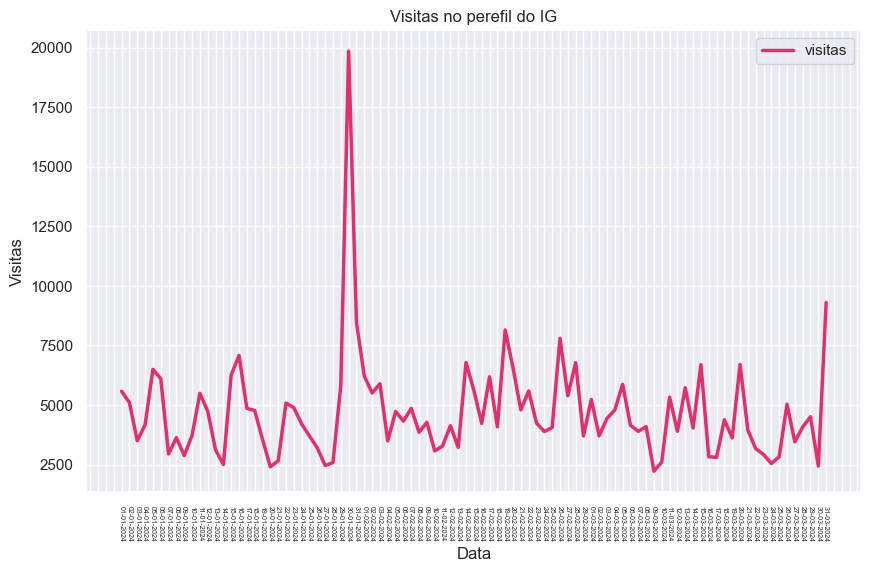

In [35]:
# VISITAS
inicio_visitasIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Visitas.csv', 'Visitas ao perfil do Instagram')

visitasIG = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Visitas.csv', skiprows=inicio_visitasIG, encoding='utf-16', skip_blank_lines=True)

visitasIG['Data'] = pd.to_datetime(visitasIG['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#833AB4", "#E1306C", "#FCAF45"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=visitasIG, label="visitas", linewidth=2.5, color=cores[1])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize=5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Visitas")
plt.title("Visitas no perefil do IG")

plt.legend()

# Exibindo o gráfico
plt.show()

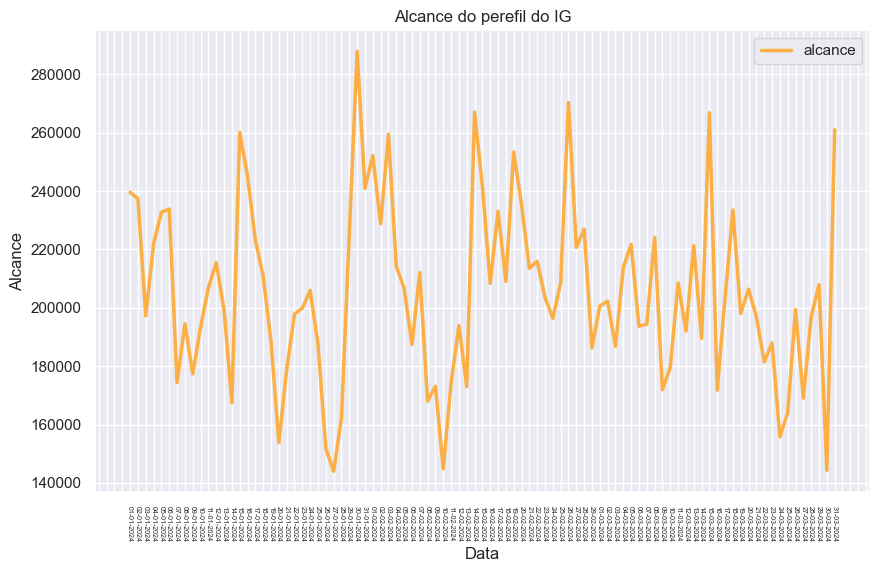

In [36]:
# ALCANCE
#final_alcanceIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Alcance.csv', 'Alcance no Facebook')
inicio_alcanceIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Alcance.csv', 'Alcance do Instagram')

alcanceIG = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\Alcance.csv', skiprows=inicio_alcanceIG, encoding='utf-16', skip_blank_lines=True) #, nrows=final_alcanceIG-5

alcanceIG['Data'] = pd.to_datetime(alcanceIG['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#833AB4", "#E1306C", "#FCAF45"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=alcanceIG, label="alcance", linewidth=2.5, color=cores[2])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize=5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Alcance")
plt.title("Alcance do perefil do IG")

plt.legend()

# Exibindo o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\1807048982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')


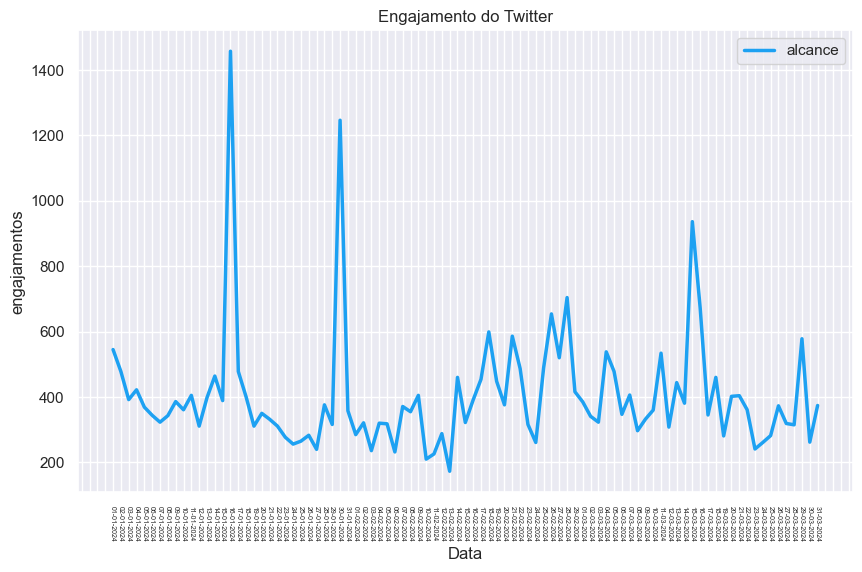

In [37]:
tw = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\twitter.csv')

twFiltrado = tw[['Data','engajamentos','impressões', 'seguiram']]
twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#1DA1F2", "#14171A", "#657786"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="engajamentos", data=twFiltrado, label="alcance", linewidth=2.5, color=cores[0])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize=5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
#plt.ylabel("Alcance")
plt.title("Engajamento do Twitter")

plt.legend()

# Exibindo o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\625728481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')


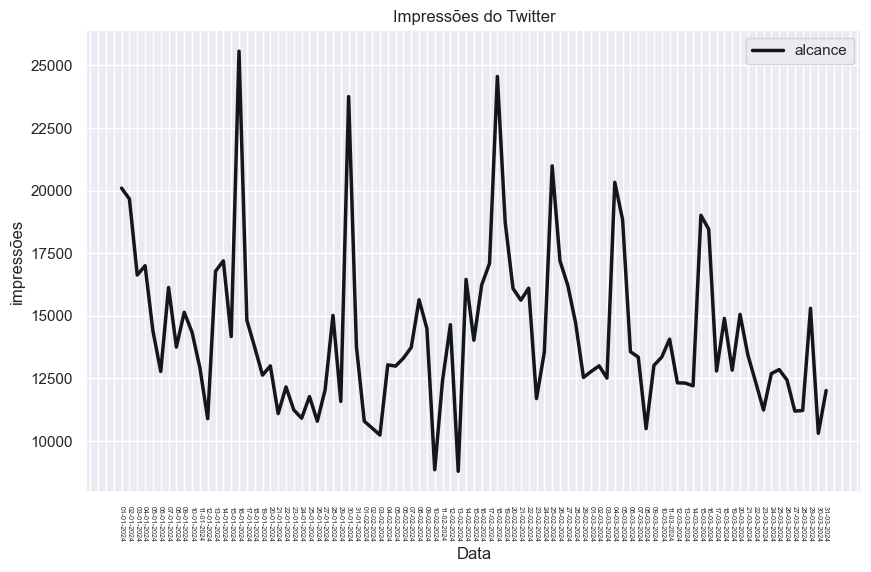

In [38]:
tw = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\twitter.csv')

twFiltrado = tw[['Data','engajamentos','impressões', 'seguiram']]
twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#1DA1F2", "#14171A", "#657786"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="impressões", data=twFiltrado, label="alcance", linewidth=2.5, color=cores[1])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize=5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
#plt.ylabel("Alcance")
plt.title("Impressões do Twitter")

plt.legend()

# Exibindo o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\2838670796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')


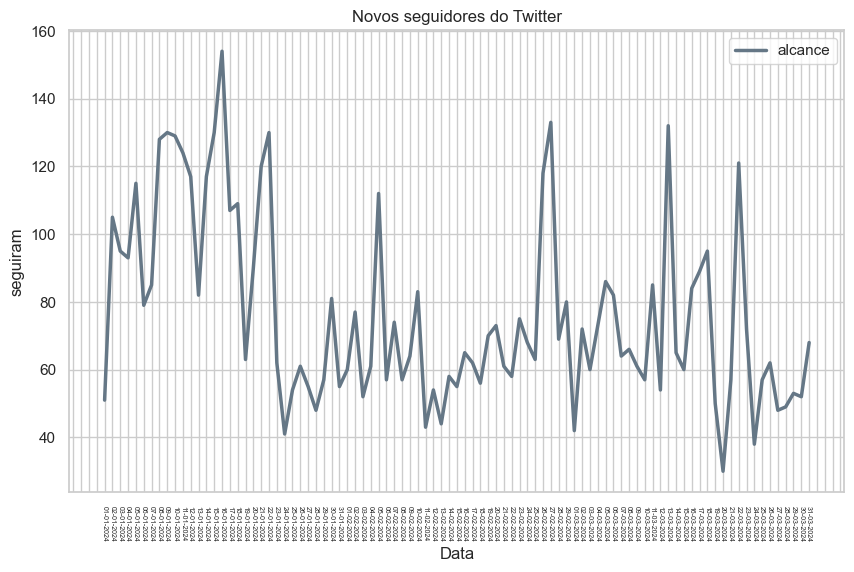

In [39]:
tw = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\twitter.csv')

twFiltrado = tw[['Data','engajamentos','impressões', 'seguiram']]
twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#1DA1F2", "#14171A", "#657786"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="seguiram", data=twFiltrado, label="alcance", linewidth=2.5, color=cores[2])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90,fontsize=5)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
#plt.ylabel("Alcance")
plt.title("Novos seguidores do Twitter")

plt.legend()

# Exibindo o gráfico
plt.show()

In [40]:
import pandas as pd

tw = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\twitter.csv')

twFiltrado = tw[['Data','engajamentos','impressões', 'seguiram']]
twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')

seguidores_twitter = twFiltrado['seguiram'].sum()
impressoes_twitter = twFiltrado['impressões'].sum()
engajamentos_twitter = twFiltrado['engajamentos'].sum()

print(seguidores_twitter)
print(impressoes_twitter)
print(engajamentos_twitter)


6953
1297355
36749


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\804335005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\758675409.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Idade do espectador', y='Visualizações (%)', data=ytb_idade_visualizações, palette="gist_heat")#"blend:#7AB,#EDA"
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to

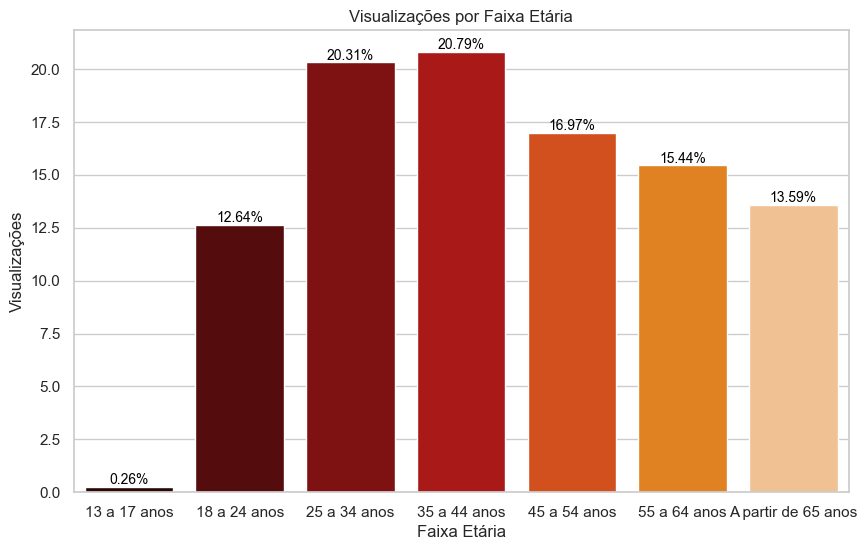

In [50]:
'''
LINK: https://www.youtube.com

VISUALIZAÇÕES POR FAIXA ETÁRIA

https://studio.youtube.com/channel/UC_y3NcZb_eSqVuRlrVeIgAA/analytics/tab-overview/period-default/explore?entity_type=CHANNEL&entity_id=UC_y3NcZb_eSqVuRlrVeIgAA&time_period=4_weeks&explore_type=TABLE_AND_CHART&metric=VIEWS&granularity=DAY&t_metrics=VIEWS&t_metrics=AVERAGE_WATCH_TIME&t_metrics=AVERAGE_WATCH_PERCENTAGE&t_metrics=WATCH_TIME&dimension=VIEWER_AGE&o_column=VIEWER_AGE&o_direction=ANALYTICS_ORDER_DIRECTION_ASC

CAMINHO: menu da foto de perfil > Alternar conta > tribunadonorte > menu da foto de perfil > YouTube Studio > Analytics (barra lateral) > MODO AVANÇADO

Ações: Idade do espectador (menu de linha) >>> icone de download* (Exportar a visualização atual) >>> Valores separados por vírgula (.csv)

--> Arquivo comprimido <--

'''

ytb_idade_visualizações = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\idadeytb.csv')

# Configurar o estilo seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Idade do espectador', y='Visualizações (%)', data=ytb_idade_visualizações, palette="gist_heat")#"blend:#7AB,#EDA"

# Adicionar rótulos diretamente acima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Faixa Etária')
plt.ylabel('Visualizações')
plt.title('Visualizações por Faixa Etária')

# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='y', style='plain')

# Mostrar o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\1547448104.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Idade do espectador', y='Tempo de exibição (horas) (%)', data=ytb_idade_horas, palette="copper")#"blend:#7AB,#EDA"
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` 

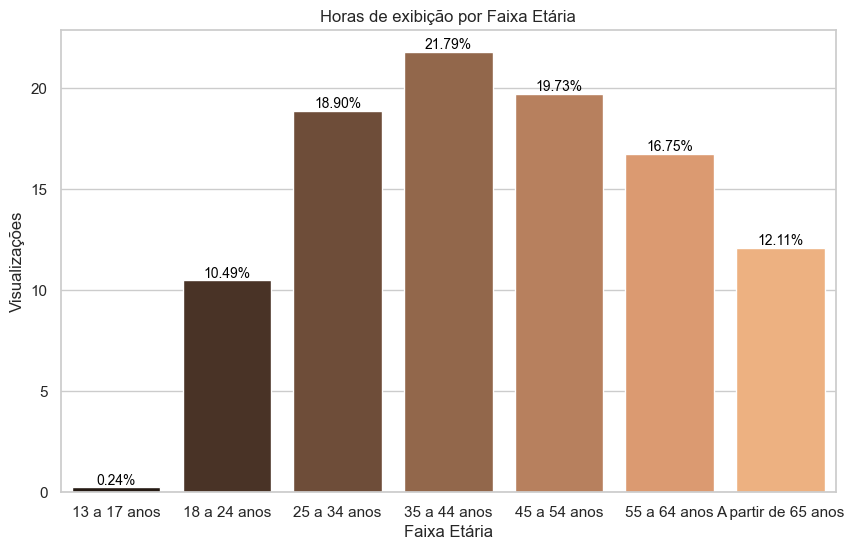

In [49]:
'''
LINK: https://www.youtube.com

https://studio.youtube.com/channel/UC_y3NcZb_eSqVuRlrVeIgAA/analytics/tab-overview/period-default/explore?entity_type=CHANNEL&entity_id=UC_y3NcZb_eSqVuRlrVeIgAA&time_period=4_weeks&explore_type=TABLE_AND_CHART&metric=VIEWS&granularity=DAY&t_metrics=VIEWS&t_metrics=AVERAGE_WATCH_TIME&t_metrics=AVERAGE_WATCH_PERCENTAGE&t_metrics=WATCH_TIME&dimension=VIEWER_AGE&o_column=VIEWER_AGE&o_direction=ANALYTICS_ORDER_DIRECTION_ASC

CAMINHO: menu da foto de perfil > Alternar conta > tribunadonorte > menu da foto de perfil > YouTube Studio > Analytics (barra lateral) > MODO AVANÇADO

Ações: Idade do espectador (menu de linha) >>> icone de download* (Exportar a visualização atual) >>> Valores separados por vírgula (.csv)

--> Arquivo comprimido <--

'''

ytb_idade_horas = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\idadeytb.csv')

# Configurar o estilo seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Idade do espectador', y='Tempo de exibição (horas) (%)', data=ytb_idade_horas, palette="copper")#"blend:#7AB,#EDA"

# Adicionar rótulos diretamente acima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Faixa Etária')
plt.ylabel('Visualizações')
plt.title('Horas de exibição por Faixa Etária')

# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='y', style='plain')

# Mostrar o gráfico
plt.show()

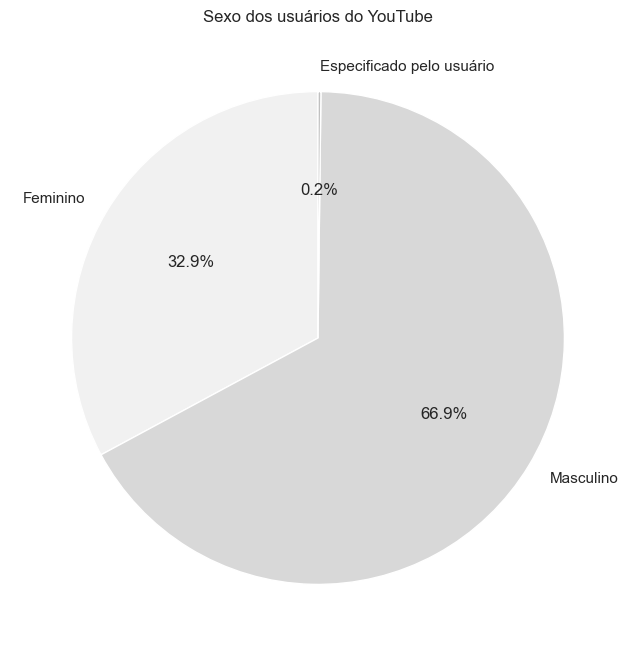

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

'''
LINK: https://www.youtube.com

https://studio.youtube.com/channel/UC_y3NcZb_eSqVuRlrVeIgAA/analytics/tab-overview/period-default/explore?entity_type=CHANNEL&entity_id=UC_y3NcZb_eSqVuRlrVeIgAA&time_period=minus_2_month&explore_type=TABLE_AND_CHART&metric=VIEWS&granularity=DAY&t_metrics=VIEWS&t_metrics=AVERAGE_WATCH_TIME&t_metrics=AVERAGE_WATCH_PERCENTAGE&t_metrics=WATCH_TIME&dimension=VIEWER_GENDER&o_column=VIEWER_GENDER&o_direction=ANALYTICS_ORDER_DIRECTION_ASC

CAMINHO: menu da foto de perfil > Alternar conta > tribunadonorte > menu da foto de perfil > YouTube Studio > Analytics (barra lateral) > MODO AVANÇADO

Ações: Gênero do espectador (menu de linha) >>> icone de download* (Exportar a visualização atual) >>> Valores separados por vírgula (.csv)

--> Arquivo comprimido <--

'''

generoytb = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\generoytb.csv')

# Criar um gráfico de pizza usando Matplotlib
plt.figure(figsize=(8, 8))  # Ajuste o tamanho da figura conforme necessário

# Plotar o gráfico de pizza usando Matplotlib
plt.pie(generoytb['Visualizações (%)'], labels=generoytb['Gênero do espectador'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("light:#787878"))

# Adicionar título
plt.title('Sexo dos usuários do YouTube')

# Exibir o gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\658663867.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Nome da cidade', y='Visualizações', data=ytb_cidades_visualizacoes.iloc[1:11,1:5], palette="copper")#"blend:#7AB,#EDA"
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `nam

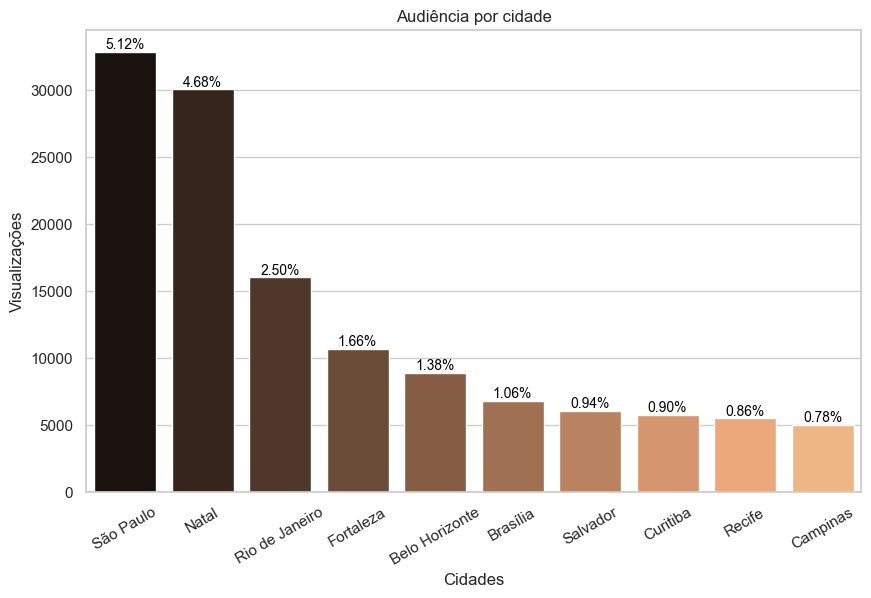

In [47]:
'''
LINK: https://www.youtube.com

VISUALIZAÇÕES POR FAIXA ETÁRIA

https://studio.youtube.com/channel/UC_y3NcZb_eSqVuRlrVeIgAA/analytics/tab-overview/period-default/explore?entity_type=CHANNEL&entity_id=UC_y3NcZb_eSqVuRlrVeIgAA&time_period=minus_2_month&explore_type=TABLE_AND_CHART&metric=VIEWS&granularity=DAY&t_metrics=VIEWS&t_metrics=WATCH_TIME&t_metrics=AVERAGE_WATCH_TIME&dimension=CITY&o_column=VIEWS&o_direction=ANALYTICS_ORDER_DIRECTION_DESC

CAMINHO: menu da foto de perfil > Alternar conta > tribunadonorte > menu da foto de perfil > YouTube Studio > Analytics (barra lateral) > MODO AVANÇADO

Ações: Cidades (menu de linha) >>> icone de download* (Exportar a visualização atual) >>> Valores separados por vírgula (.csv)

--> Arquivo comprimido <--

'''

ytb_cidades_visualizacoes = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\cidadesytb.csv')

# Configurar o estilo seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Nome da cidade', y='Visualizações', data=ytb_cidades_visualizacoes.iloc[1:11,1:5], palette="copper")#"blend:#7AB,#EDA"

total_visualizacoes_cidades = ytb_cidades_visualizacoes.iloc[0,:]['Visualizações']


# Adicionar rótulos diretamente acima de cada barra
for p in ax.patches:
    ax.annotate(f'{(p.get_height()/total_visualizacoes_cidades)*100:,.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Cidades')
plt.ylabel('Visualizações')
plt.title('Audiência por cidade')

# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='y', style='plain')

plt.xticks(rotation=30)

# Mostrar o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13524\2611613412.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Nome da cidade', y='Tempo de exibição (horas)', data=ytb_cidades_horas.iloc[1:11,1:6], palette="copper")#"blend:#7AB,#EDA"
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of

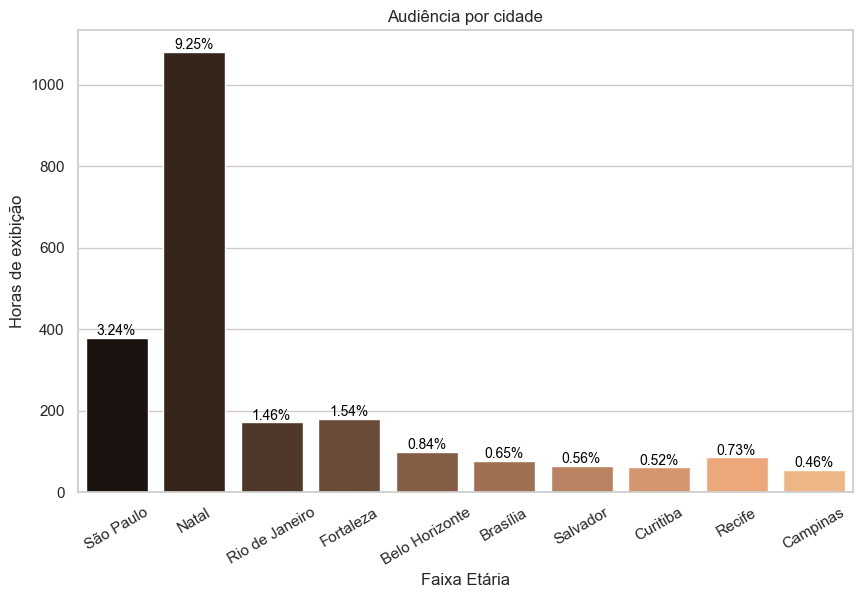

In [46]:
'''
LINK: https://www.youtube.com

VISUALIZAÇÕES POR FAIXA ETÁRIA

https://studio.youtube.com/channel/UC_y3NcZb_eSqVuRlrVeIgAA/analytics/tab-overview/period-default/explore?entity_type=CHANNEL&entity_id=UC_y3NcZb_eSqVuRlrVeIgAA&time_period=minus_2_month&explore_type=TABLE_AND_CHART&metric=VIEWS&granularity=DAY&t_metrics=VIEWS&t_metrics=WATCH_TIME&t_metrics=AVERAGE_WATCH_TIME&dimension=CITY&o_column=VIEWS&o_direction=ANALYTICS_ORDER_DIRECTION_DESC

CAMINHO: menu da foto de perfil > Alternar conta > tribunadonorte > menu da foto de perfil > YouTube Studio > Analytics (barra lateral) > MODO AVANÇADO

Ações: Cidades (menu de linha) >>> icone de download* (Exportar a visualização atual) >>> Valores separados por vírgula (.csv)

--> Arquivo comprimido <--

'''

ytb_cidades_horas = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\TNtrimestral\cidadesytb.csv')

# Configurar o estilo seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Nome da cidade', y='Tempo de exibição (horas)', data=ytb_cidades_horas.iloc[1:11,1:6], palette="copper")#"blend:#7AB,#EDA"

total_horas_cidades = ytb_cidades_horas.iloc[0,:]['Tempo de exibição (horas)']


# Adicionar rótulos diretamente acima de cada barra
for p in ax.patches:
    ax.annotate(f'{(p.get_height()/total_horas_cidades)*100:,.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Faixa Etária')
plt.ylabel('Horas de exibição')
plt.title('Audiência por cidade')

# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='y', style='plain')

plt.xticks(rotation=30)

# Mostrar o gráfico
plt.show()